In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage as ndimage
from datetime import datetime, timedelta
from netCDF4 import num2date
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from __future__ import print_function
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from metpy.units import units
from metpy.calc import dewpoint_rh, get_layer

In [2]:
#year, month, day, UTC = raw_input("Input the year, month, and day").split
year = "2017"
month = "03"
day = "07"
UTC = "00"
#lat,lon = raw_input('What are the lat-lon coordinates of the central point?').split()
lat = "37"
lon = "-101"

In [3]:
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/201504/20150422/catalog.xml')
#cat = TDSCatalog('https://nomads.ncdc.noaa.gov/thredds/ncss/grid/namanl/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/namanl_218_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_000.grb/dataset.html')
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/catalog.html?dataset=rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_000.grb2')
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/catalog.html?dataset=rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'_000.grb2')
#latest_ds = list(cat.datasets.values())[0]
cat = TDSCatalog('https://nomads.ncdc.noaa.gov/thredds/catalog/namanl/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/catalog.html?dataset=namanl/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/namanl_218_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_000.grb')
latest_ds = list(cat.datasets.values())[0]
#print(latest_ds.access_urls)
ncss = NCSS(latest_ds.access_urls['NetcdfServer'])

C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\siphon\catalog.py:71: UserWarning: URL https://nomads.ncdc.noaa.gov/thredds/catalog/namanl/201703/20170307/catalog.html?dataset=namanl/201703/20170307/namanl_218_20170307_0000_000.grb returned HTML. Changing to: https://nomads.ncdc.noaa.gov/thredds/catalog/namanl/201703/20170307/catalog.xml?dataset=namanl/201703/20170307/namanl_218_20170307_0000_000.grb
  new_url))


In [4]:

#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/201504/20150422/catalog.xml')
#cat = TDSCatalog('http://nomads.ncdc.noaa.gov/thredds/ncss/grid/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_000.grb2/dataset.xml')

#latest_ds = list(cat.datasets.values())[0]
#http://nomads.ncdc.noaa.gov/thredds/catalog/ruc130anl/201504/20150409/catalog.xml
#Use OpenDAP instead
print('http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/201504/20150409/catalog.html?dataset=rap130/201504/20150409/rap_130_20150409_2300_000.grb2')

http://nomads.ncdc.noaa.gov/thredds/catalog/rap130/201504/20150409/catalog.html?dataset=rap130/201504/20150409/rap_130_20150409_2300_000.grb2


In [5]:
fname = 'cb_2016_us_county_20m/cb_2016_us_county_20m.shp'
fname2 = 'cb_2016_us_state_20m/cb_2016_us_state_20m.shp'
counties = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
states = ShapelyFeature(Reader(fname2).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
#ncss = NCSS(latest_ds.access_urls['NetcdfServer'])
#ncss = NCSS('http://nomads.ncdc.noaa.gov/thredds/ncss/grid/rap130/'+str(year)+str(month)+'/'+str(year)+str(month)+str(day)+'/rap_130_'+str(year)+str(month)+str(day)+'_'+str(UTC)+'00_018.grb2/dataset.xml')

In [23]:
cenlat = float(lat)
cenlon = float(lon)
print(cenlon)
print(cenlat)
query = ncss.query()
query.variables('Temperature_height_above_ground').variables('Mean_sea_level_pressure_NAM_model').variables('Convective_Avail_Pot_Energy_surface').variables('Convective_inhibition_surface').variables('Dew_point_temperature').variables('Storm_relative_helicity').variables('u_wind_height_above_ground').variables('v_wind_height_above_ground').variables('u_wind').variables('v_wind').variables('Convective_Avail_Pot_Energy').variables('Geopotential_height').variables('Relative_humidity').variables('Temperature')
query.add_lonlat().lonlat_box(cenlon-10.5, cenlon +10.5, cenlat-9, cenlat+8.5)
data = ncss.get_data(query)
T = data.variables['Temperature_height_above_ground'][:]
MSL = data.variables['Mean_sea_level_pressure_NAM_model'][:]
CAPE = data.variables['Convective_Avail_Pot_Energy_surface'][:]
MUCAPE = data.variables['Convective_Avail_Pot_Energy'][:]
CIN = data.variables['Convective_inhibition_surface'][:]
DWP = data.variables['Dew_point_temperature'][:]
usfc = data.variables['u_wind_height_above_ground'][:]
vsfc = data.variables['v_wind_height_above_ground'][:]
ushr = data.variables['u_wind'][:]
vshr = data.variables['v_wind'][:]
SRH = data.variables['Storm_relative_helicity'][:]
hgt = data.variables['Geopotential_height'][:]
up_temp = data.variables['Temperature'][:] * units('degK')
up_rh = data.variables['Relative_humidity'][:]

#u6shr = data.variables['Vertical_u_shear'][:]
#v6shr = data.variables['Vertical_v_shear'][:]
#LCL = data.variables['Geopotential_height_cloud_base'][:]

print(lcl)
dtime = data.variables['Temperature_height_above_ground'].dimensions[0]
dlev = data.variables['Temperature'].dimensions[1]
dlat = data.variables['Temperature_height_above_ground'].dimensions[2]
dlon = data.variables['Temperature_height_above_ground'].dimensions[3]

# Get the dimension data
lats = data.variables[dlat][:]
lons = data.variables[dlon][:]
lev = data.variables[dlev][:] * units('hPa')
time = data.variables[dtime]
vtimes = num2date(time[:],time.units)

Tf = ((T-273.15)*(9./5.))+32.
Tdf = ((DWP-273.15)*(9./5.))+32.
MSLH = MSL/100
#print(LCL)

-101.0
37.0
[[[-5000.   -5000.   -5000.   ...,   793.5    588.25   362.5 ]
  [-5000.   -5000.   -5000.   ...,   754.5    765.75   592.  ]
  [-5000.   -5000.   -5000.   ...,   730.25   792.25   747.5 ]
  ..., 
  [ 2900.    2978.25  3010.5  ...,   523.5    526.75   530.25]
  [ 2876.75  2916.75  2945.   ...,   525.75   531.25   537.25]
  [ 2863.    2856.5   2884.25 ...,   532.5    537.5    544.5 ]]]


In [7]:

Tdc = dewpoint_rh(up_temp[0,:,:, :],up_rh[0,:,:,:]/100)

C:\Users\matts\Metpy_fun\MetPy\metpy\calc\thermo.py:469: RuntimeWarning: divide by zero encountered in log
  val = np.log(e / sat_pressure_0c)
C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\pint\quantity.py:1403: RuntimeWarning: divide by zero encountered in log
  out = uf(*mobjs)
C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\pint\quantity.py:802: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [8]:
print(Tdc.shape)

(39, 171, 170)


In [9]:
#Let's set up the map projection!
# Set up our projection
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Set up our array of latitude and longitude values and transform to 
# the desired projection.
clons, clats = np.meshgrid(lons[:]*1000, lats[:]*1000)
tlatlons = crs.transform_points(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats)
tlons = tlatlons[:,:,0]
tlats = tlatlons[:,:,1]

# Limit the extent of the map area, must convert to proper coords.
LL = crs.transform_point(cenlon-8.5,cenlat-4.5,ccrs.PlateCarree())
UR = crs.transform_point(cenlon+6.5,cenlat+4.0,ccrs.PlateCarree())

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')

In [10]:
print(LL)
print(UR)

(-891978.1816954601, -1336150.617181083)
(460193.76760615007, -429159.2184087804)


55


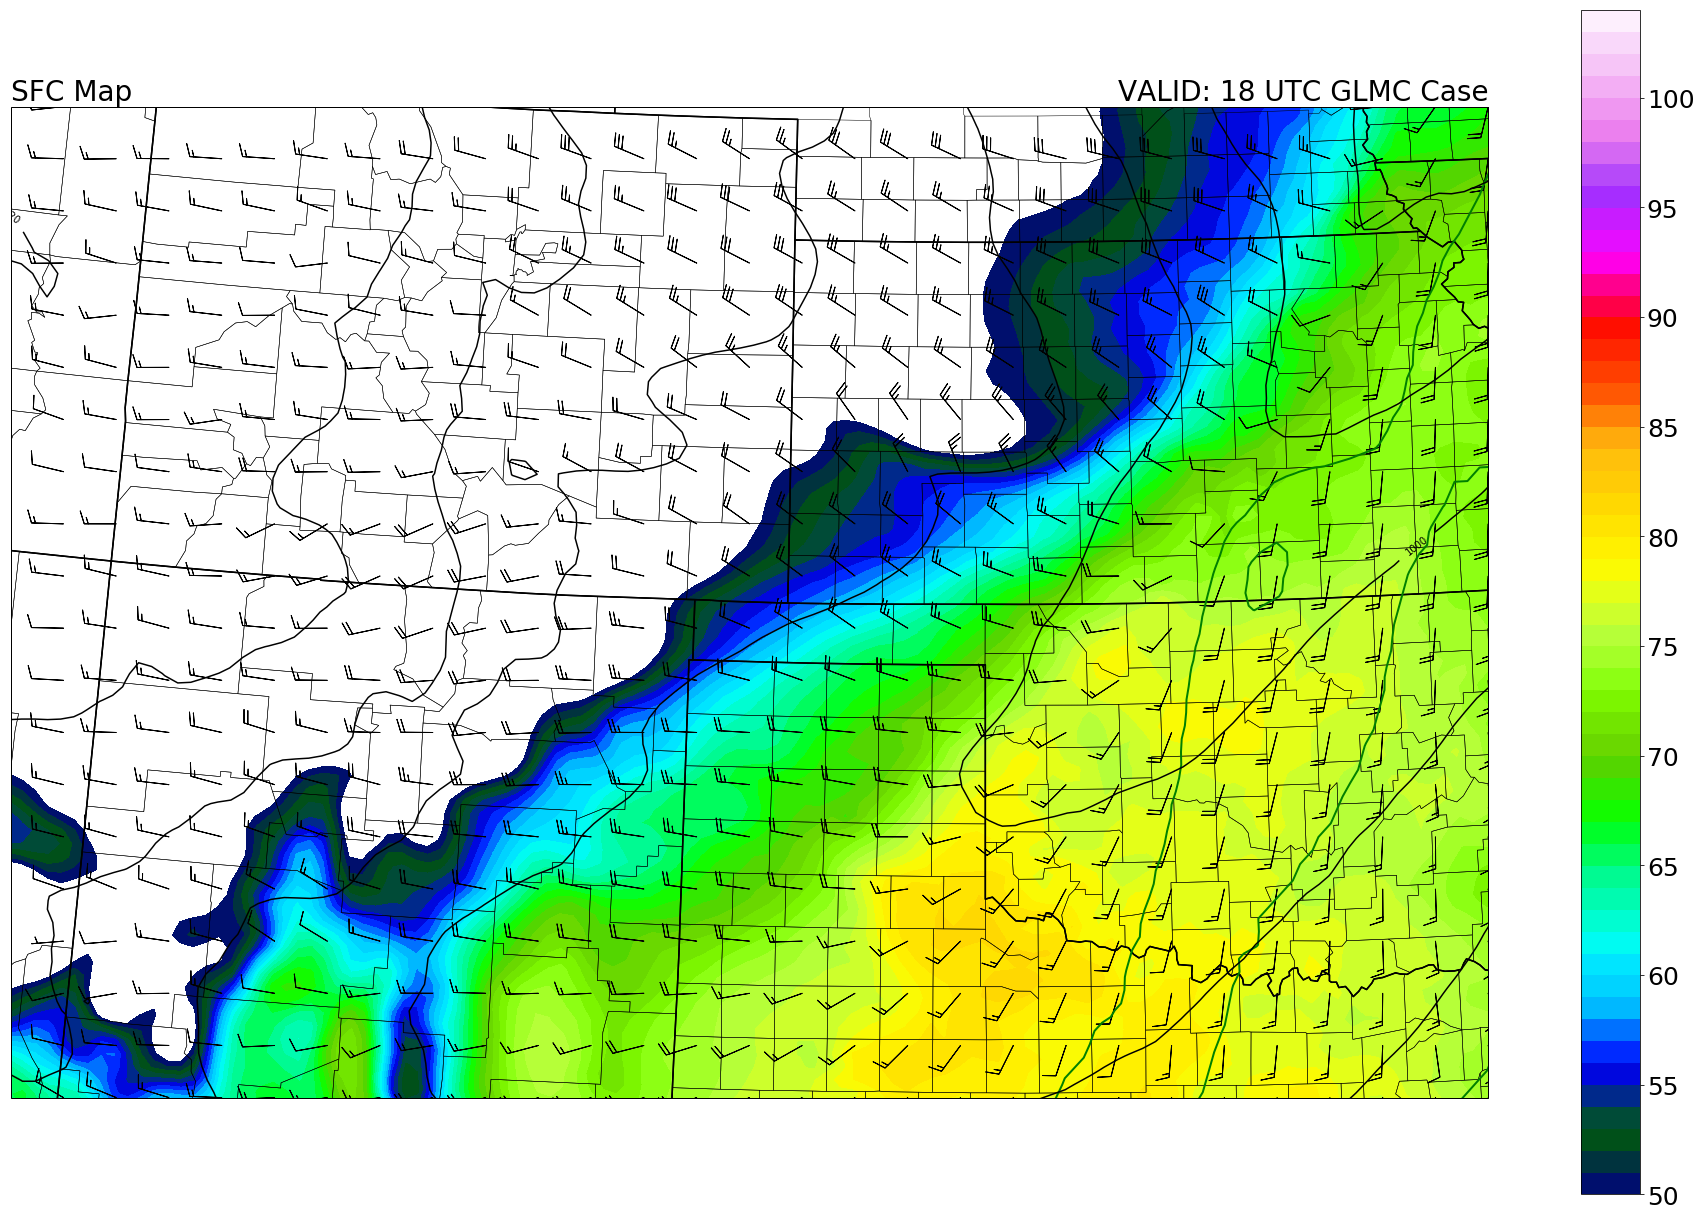

In [11]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
#ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
#Tlev = np.arange(0, 105, 2)
Tlev = np.arange(50, 105, 1)
print(Tlev.shape[0])
Tdlev = np.arange(55,90,5)
Plev = np.arange(900, 1070, 4)
#Tds = ndimage.gaussian_filter(Tdf, sigma=1.1, order=0)
#cs = ax.contour(tlons,tlats,Tf[FH,0,:,:],Tlev,color=plt.cm.gist_ncar, linewidths = '2')#,latlon=True)
#plt.colorbar(cs,orientation='vertical', shrink =
cs = ax.contourf(tlons,tlats,Tf[FH,0,:,:],Tlev,cmap=plt.cm.gist_ncar)
cd = ax.contour(tlons, tlats, Tdf[FH,0,:,:],Tdlev,colors = 'g', linewidths = 2)
cm = ax.contour(tlons, tlats, MSLH[FH,:,:],Plev,colors = 'k')
ut, vt = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats,usfc[FH,0,:,:]*1.944,vsfc[FH,0,:,:]*1.944)
ax.barbs(tlons,tlats,ut,vt,length=8,regrid_shape=20)
#plt.clabel(cd, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(cm, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
#plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
cb = plt.colorbar(cs, ticks = [50,55,60,65,70,75,80,85,90,95,100])
cb.ax.tick_params(labelsize=25)
plt.title('SFC Map',loc='left', size = 28)
#plt.suptitle(str(Tlev.shape[0])+' positive strikes', size = 30, y = .78, x = .635)
#plt.title(str(Tlev.shape[0])+' negative strikes', size = 30, y = .92, x = .8)

#plt.text()
#plt.title('VALID: %s' %(vtimes[FH]),loc='right', size = 28)
plt.title('VALID: 18 UTC GLMC Case',loc='right', size = 28)
plt.tight_layout()
#plt.savefig('GLMC_sfc_18utc.png')
plt.show()

In [12]:
uform = T.shape
#print(uform[3])
xformi = int(uform[2])
yformi = int(uform[3])
print(yformi)

170


In [13]:
def haines_index(pressure, temperature, dewpoint, level='mid'):
    if level is 'low':
        top = 850 * units('hPa')
        bottom = 925 * units('hPa')
        stability_bottom = 4 * units('degC')
        stability_top = 7 * units('degC')
        moisture_bottom = 6 * units('degC')
        moisture_top = 9 * units('degC')
        dewp_dep_lev = top
    elif level is 'mid':
        top = 700 * units('hPa')
        bottom = 850 * units('hPa')
        stability_bottom = 6 * units('degC')
        stability_top = 10 * units('degC')
        moisture_bottom = 6 * units('degC')
        moisture_top = 12 * units('degC')
        dewp_dep_lev = bottom
    elif level is 'high':
        top = 500 * units('hPa')
        bottom = 700 * units('hPa')
        stability_bottom = 18 * units('degC')
        stability_top = 21 * units('degC')
        moisture_bottom = 15 * units('degC')
        moisture_top = 20 * units('degC')
        dewp_dep_lev = bottom
    else:
        print('Not a recognized level')
        
    layer = get_layer(pressure, temperature, dewpoint, bottom = bottom, depth = bottom - top)
    temp_dep = layer[1][layer[0] == dewp_dep_lev]
    dewp_dep = layer[2][layer[0] == dewp_dep_lev]
    dewpoint_depression = (temp_dep.magnitude - dewp_dep.magnitude) * units('degC')
    stability = (layer[1][0].magnitude - layer[1][-1].magnitude) * units('degC')
    #print(dewpoint_depression, stability)
    
    if stability < stability_bottom:
        stability_index = 1.
    elif stability > stability_top:
        stability_index = 3.
    else:
        stability_index = 2.
    
    if dewpoint_depression < moisture_bottom:
        moisture_index = 1.
    elif dewpoint_depression > moisture_top:
        moisture_index = 3.
    else:
        moisture_index = 2.
        
    return stability_index + moisture_index
    
    
    

In [14]:
print(lev.shape)
levs = np.zeros((lev.shape[0], Tdc.shape[1], Tdc.shape[2]))
for i in range(Tdc.shape[1]):
    for j in range(Tdc.shape[2]):
        levs[:,i,j] = lev
print(levs[:,0,0])

(39,)
[ 1000.   975.   950.   925.   900.   875.   850.   825.   800.   775.
   750.   725.   700.   675.   650.   625.   600.   575.   550.   525.
   500.   475.   450.   425.   400.   375.   350.   325.   300.   275.
   250.   225.   200.   175.   150.   125.   100.    75.    50.]


In [15]:
print(Tdc.shape)
print(Tdc[:,0,0])

(39, 171, 170)
[ 14.48584366   3.70108652  -4.47410727   3.50439668  -0.37348485  -6.49481535 -11.35470867 -15.94204617 -13.89633179 -14.04475784 -18.70098686 -25.04109573 -29.91055107 -36.486763   -48.08705902 -49.42636871          nan          nan -53.92993546 -46.16865158 -41.79363632 -39.08893585 -37.15357208 -35.66213226 -34.96279907 -35.69012833 -38.77348328 -41.95420837 -45.69895172 -49.82249451 -54.18774796 -58.65967941 -63.25449753 -73.42959595 -82.00127411 -83.64596558 -85.12325287 -87.01284027 -86.09538269] degC


In [16]:
haines_i = np.zeros((Tdc.shape[1], Tdc.shape[2]))
for i in range(Tdc.shape[1]):
    for j in range(Tdc.shape[2]):
        haines_i[i,j] = haines_index(levs[:,i,j] * units('hPa'), up_temp[0,:,i,j].to('degC'), Tdc[:,i,j], level = 'mid')

In [17]:
print(haines_i.shape)
haines_i_1 = haines_i + 1
print(np.min(haines_i))

(171, 170)
2.0


55


C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


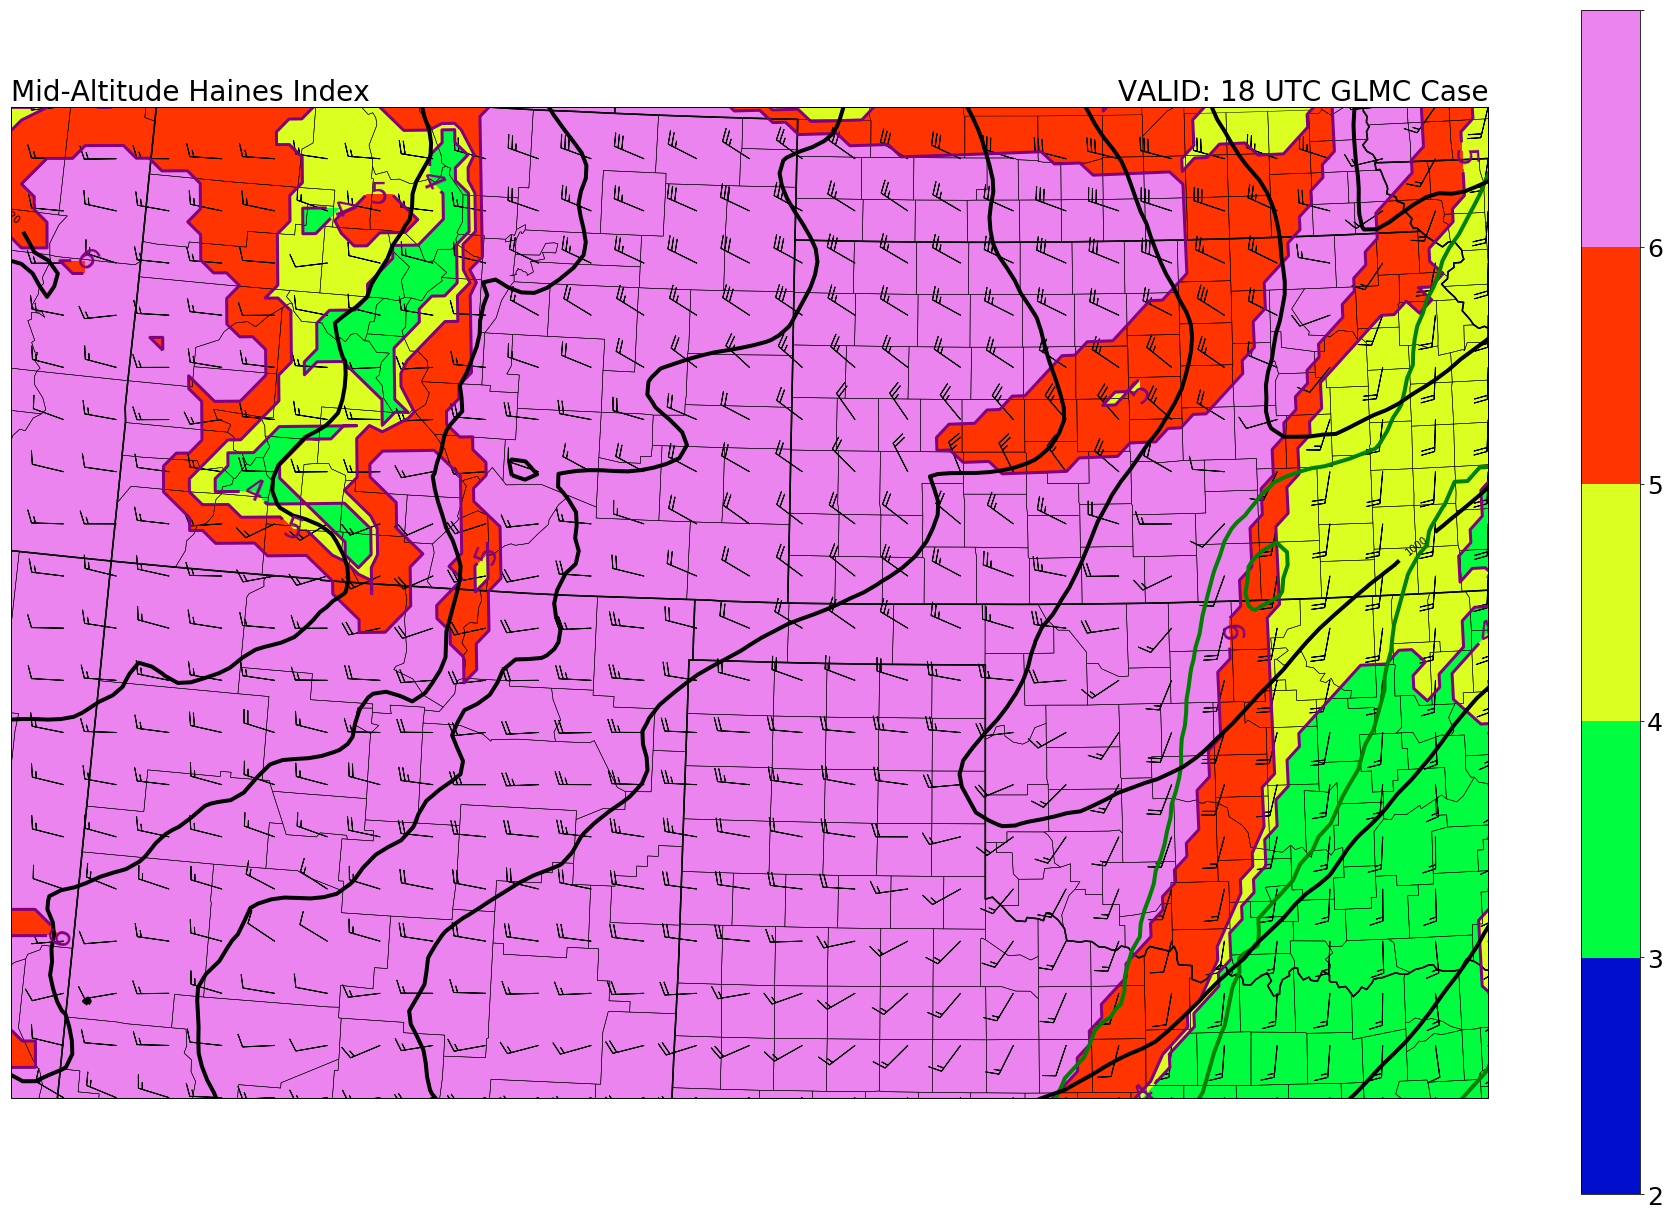

In [18]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
#ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
#Tlev = np.arange(0, 105, 2)
Hlev = np.arange(1, 7, 1)
print(Tlev.shape[0])
Tdlev = np.arange(55,90,5)
Plev = np.arange(900, 1070, 4)
#Tds = ndimage.gaussian_filter(Tdf, sigma=1.1, order=0)
#cs = ax.contour(tlons,tlats,Tf[FH,0,:,:],Tlev,color=plt.cm.gist_ncar, linewidths = '2')#,latlon=True)
#plt.colorbar(cs,orientation='vertical', shrink =
cs = ax.contourf(tlons,tlats,haines_i,Hlev,cmap=plt.cm.gist_ncar)
ch = ax.contour(tlons, tlats, haines_i_1,Hlev,colors = 'purple', linewidths = 3)
cd = ax.contour(tlons, tlats, Tdf[FH,0,:,:],Tdlev,colors = 'g', linewidths = 4)
cm = ax.contour(tlons, tlats, MSLH[FH,:,:],Plev,colors = 'k', linewidths = 4)
ut, vt = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats,usfc[FH,0,:,:]*1.944,vsfc[FH,0,:,:]*1.944)
ax.barbs(tlons,tlats,ut,vt,length=8,regrid_shape=20)
#plt.clabel(cd, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(cm, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(ch, fontsize=30, inline=1, inline_spacing=5, fmt='%i', rightside_up=True, use_clabeltext=True)

#plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
cb = plt.colorbar(cs)
cb.ax.set_yticklabels(['2','3','4','5','6','',''])
cb.ax.tick_params(labelsize=25)
plt.title('Mid-Altitude Haines Index',loc='left', size = 28)
#plt.suptitle(str(Tlev.shape[0])+' positive strikes', size = 30, y = .78, x = .635)
#plt.title(str(Tlev.shape[0])+' negative strikes', size = 30, y = .92, x = .8)

#plt.text()
#plt.title('VALID: %s' %(vtimes[FH]),loc='right', size = 28)
plt.title('VALID: 18 UTC GLMC Case',loc='right', size = 28)
plt.tight_layout()
#plt.savefig('GLMC_sfc_18utc.png')
plt.show()

In [19]:
haines_i_h = np.zeros((Tdc.shape[1], Tdc.shape[2]))
for i in range(Tdc.shape[1]):
    for j in range(Tdc.shape[2]):
        haines_i_h[i,j] = haines_index(levs[:,i,j] * units('hPa'), up_temp[0,:,i,j].to('degC'), Tdc[:,i,j], level = 'high')

55


C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


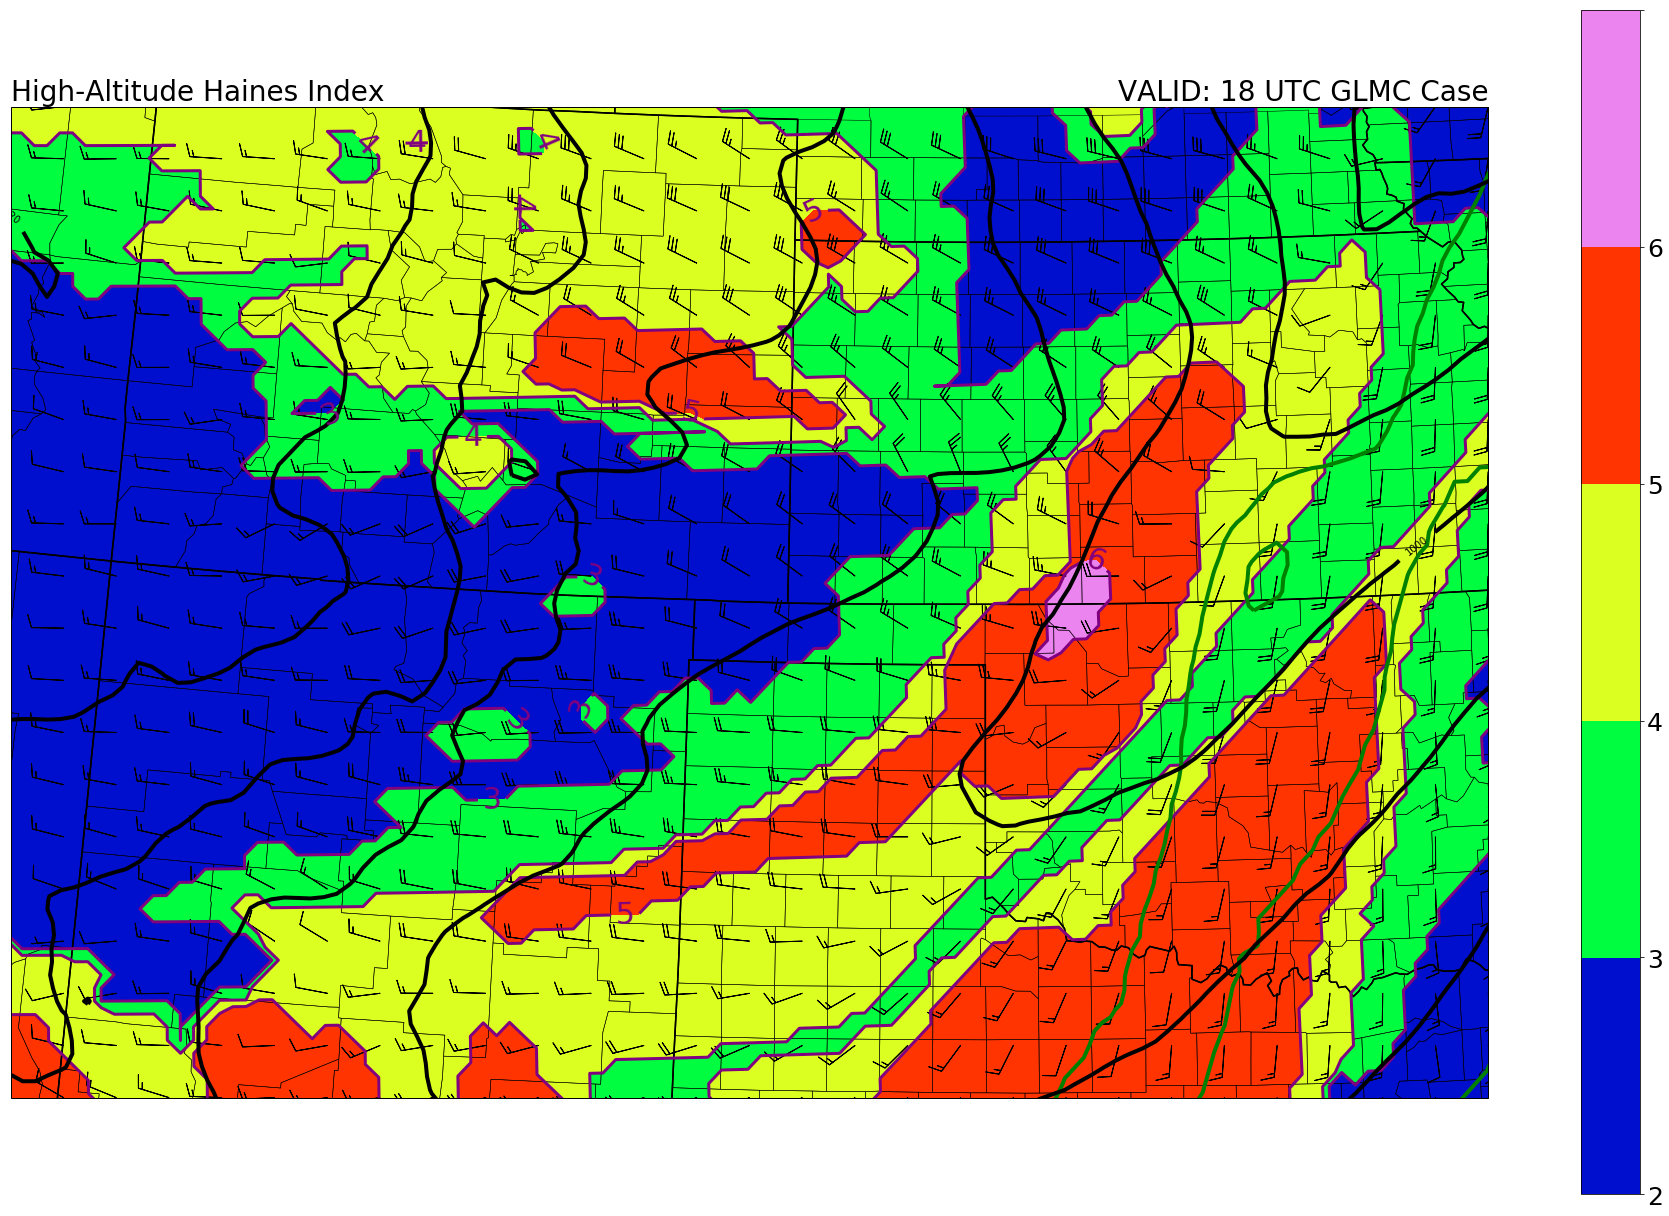

In [20]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
#ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
#Tlev = np.arange(0, 105, 2)
Hlev = np.arange(1, 7, 1)
print(Tlev.shape[0])
Tdlev = np.arange(55,90,5)
Plev = np.arange(900, 1070, 4)
#Tds = ndimage.gaussian_filter(Tdf, sigma=1.1, order=0)
#cs = ax.contour(tlons,tlats,Tf[FH,0,:,:],Tlev,color=plt.cm.gist_ncar, linewidths = '2')#,latlon=True)
#plt.colorbar(cs,orientation='vertical', shrink =
cs = ax.contourf(tlons,tlats,haines_i_h,Hlev,cmap=plt.cm.gist_ncar)
ch = ax.contour(tlons, tlats, haines_i_h +1.,Hlev,colors = 'purple', linewidths = 3)
cd = ax.contour(tlons, tlats, Tdf[FH,0,:,:],Tdlev,colors = 'g', linewidths = 4)
cm = ax.contour(tlons, tlats, MSLH[FH,:,:],Plev,colors = 'k', linewidths = 4)
ut, vt = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats,usfc[FH,0,:,:]*1.944,vsfc[FH,0,:,:]*1.944)
ax.barbs(tlons,tlats,ut,vt,length=8,regrid_shape=20)
#plt.clabel(cd, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(cm, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(ch, fontsize=30, inline=1, inline_spacing=5, fmt='%i', rightside_up=True, use_clabeltext=True)

#plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
cb = plt.colorbar(cs)
cb.ax.set_yticklabels(['2','3','4','5','6','',''])
cb.ax.tick_params(labelsize=25)
plt.title('High-Altitude Haines Index',loc='left', size = 28)
#plt.suptitle(str(Tlev.shape[0])+' positive strikes', size = 30, y = .78, x = .635)
#plt.title(str(Tlev.shape[0])+' negative strikes', size = 30, y = .92, x = .8)

#plt.text()
#plt.title('VALID: %s' %(vtimes[FH]),loc='right', size = 28)
plt.title('VALID: 18 UTC GLMC Case',loc='right', size = 28)
plt.tight_layout()
#plt.savefig('GLMC_sfc_18utc.png')
plt.show()

In [21]:
haines_i_l = np.zeros((Tdc.shape[1], Tdc.shape[2]))
for i in range(Tdc.shape[1]):
    for j in range(Tdc.shape[2]):
        haines_i_l[i,j] = haines_index(levs[:,i,j] * units('hPa'), up_temp[0,:,i,j].to('degC'), Tdc[:,i,j], level = 'low')

55


C:\Users\matts\Miniconda3\envs\devel\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


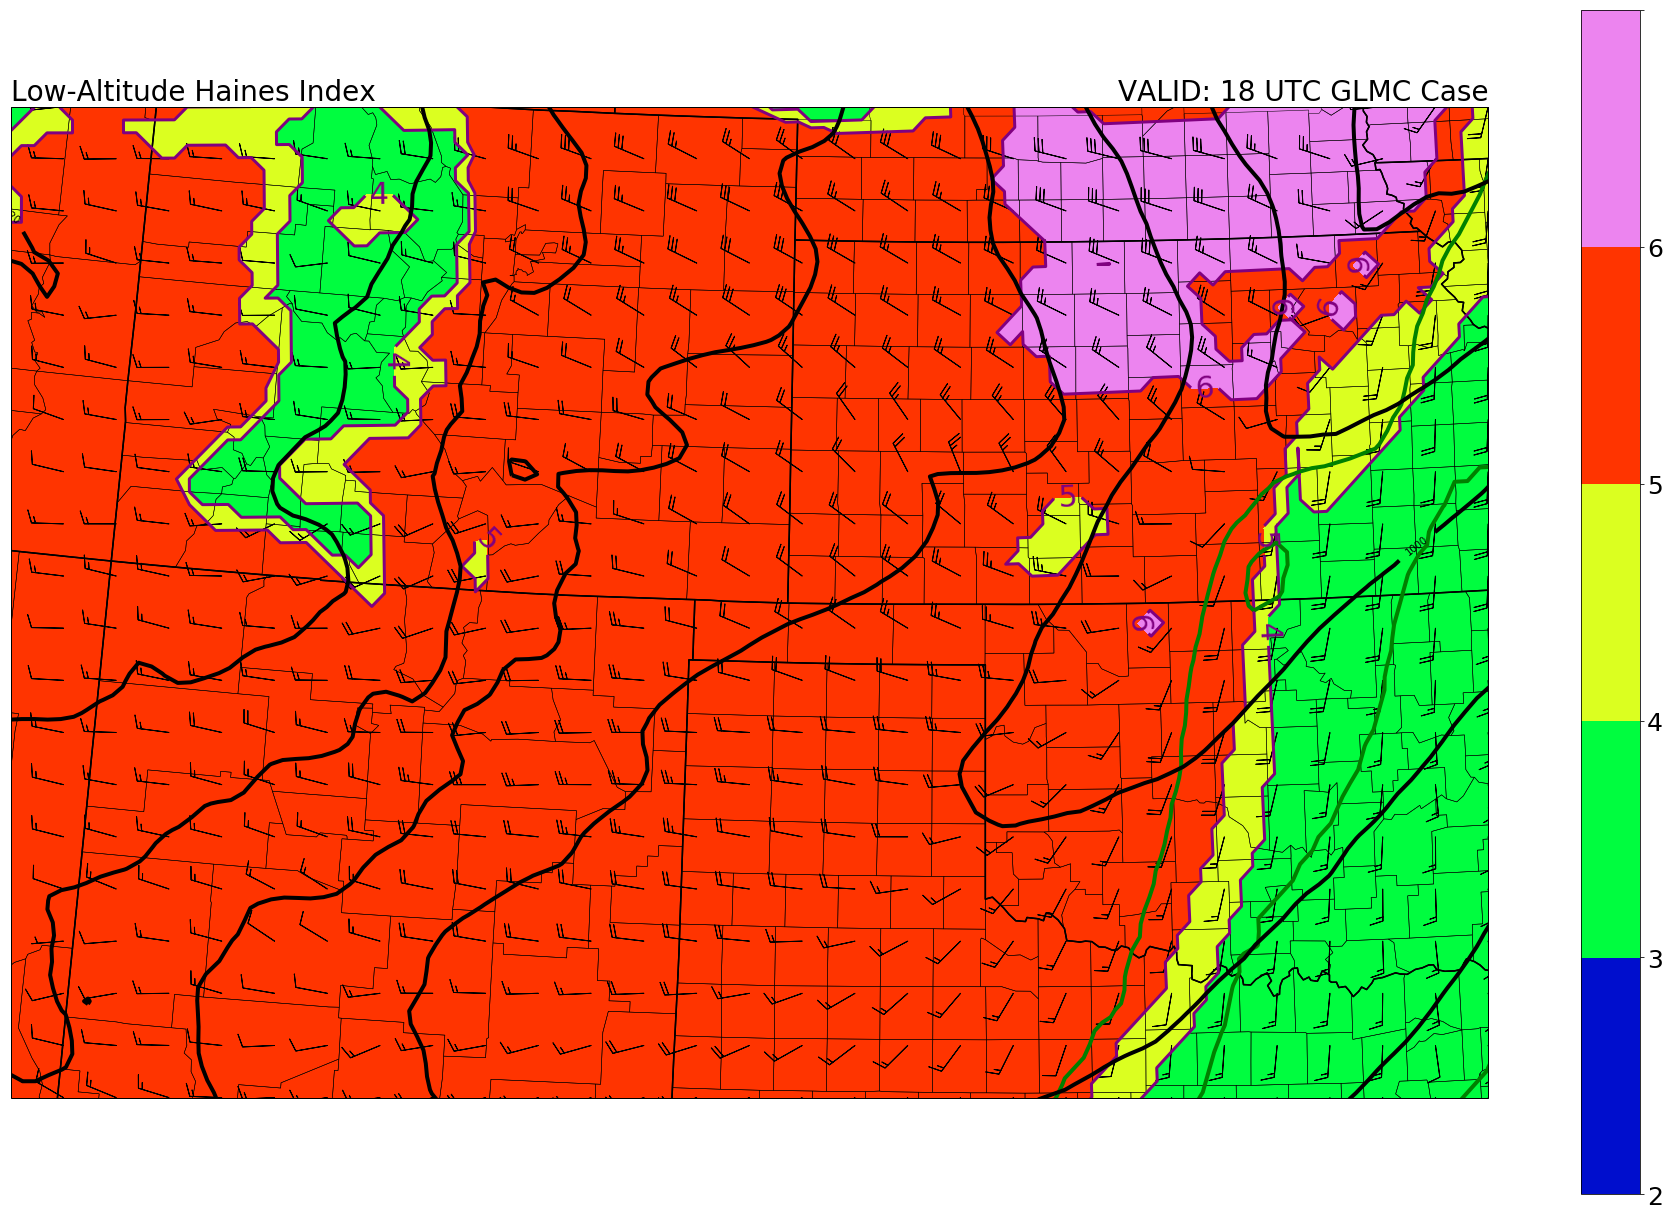

In [22]:
%matplotlib inline
#plt.style.use('bmh')
# Choose Forecast Hour (FH), FH = 0 is the first hour of dataset
# You can change and rerun this cell to get the different forecast hour
FH = 0
fig=plt.figure(1,figsize=(26.,17.))
ax = plt.subplot(111,projection=crs)
#   ax.set_extent([west long, east long, south lat, north lat])
ax.set_extent([LL[0],UR[0],LL[1],UR[1]],crs)
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
#ax.add_feature(states_provinces,edgecolor='black',linewidth=0.5)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
#Tlev = np.arange(0, 105, 2)
Hlev = np.arange(1, 7, 1)
print(Tlev.shape[0])
Tdlev = np.arange(55,90,5)
Plev = np.arange(900, 1070, 4)
#Tds = ndimage.gaussian_filter(Tdf, sigma=1.1, order=0)
#cs = ax.contour(tlons,tlats,Tf[FH,0,:,:],Tlev,color=plt.cm.gist_ncar, linewidths = '2')#,latlon=True)
#plt.colorbar(cs,orientation='vertical', shrink =
cs = ax.contourf(tlons,tlats,haines_i_l,Hlev,cmap=plt.cm.gist_ncar)
ch = ax.contour(tlons, tlats, haines_i_l +1.,Hlev,colors = 'purple', linewidths = 3)
cd = ax.contour(tlons, tlats, Tdf[FH,0,:,:],Tdlev,colors = 'g', linewidths = 4)
cm = ax.contour(tlons, tlats, MSLH[FH,:,:],Plev,colors = 'k', linewidths = 4)
ut, vt = crs.transform_vectors(ccrs.LambertConformal(central_longitude=265, central_latitude=25, standard_parallels=(25.,25.)),clons,clats,usfc[FH,0,:,:]*1.944,vsfc[FH,0,:,:]*1.944)
ax.barbs(tlons,tlats,ut,vt,length=8,regrid_shape=20)
#plt.clabel(cd, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(cm, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
plt.clabel(ch, fontsize=30, inline=1, inline_spacing=5, fmt='%i', rightside_up=True, use_clabeltext=True)

#plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, fmt='%i', rightside_up=True, use_clabeltext=True)
cb = plt.colorbar(cs)
cb.ax.set_yticklabels(['2','3','4','5','6','',''])
cb.ax.tick_params(labelsize=25)
plt.title('Low-Altitude Haines Index',loc='left', size = 28)
#plt.suptitle(str(Tlev.shape[0])+' positive strikes', size = 30, y = .78, x = .635)
#plt.title(str(Tlev.shape[0])+' negative strikes', size = 30, y = .92, x = .8)

#plt.text()
#plt.title('VALID: %s' %(vtimes[FH]),loc='right', size = 28)
plt.title('VALID: 18 UTC GLMC Case',loc='right', size = 28)
plt.tight_layout()
#plt.savefig('GLMC_sfc_18utc.png')
plt.show()

[[[ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
  [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
  [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
  ..., 
  [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
  [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
  [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]]

 [[  975.   975.   975. ...,   975.   975.   975.]
  [  975.   975.   975. ...,   975.   975.   975.]
  [  975.   975.   975. ...,   975.   975.   975.]
  ..., 
  [  975.   975.   975. ...,   975.   975.   975.]
  [  975.   975.   975. ...,   975.   975.   975.]
  [  975.   975.   975. ...,   975.   975.   975.]]

 [[  950.   950.   950. ...,   950.   950.   950.]
  [  950.   950.   950. ...,   950.   950.   950.]
  [  950.   950.   950. ...,   950.   950.   950.]
  ..., 
  [  950.   950.   950. ...,   950.   950.   950.]
  [  950.   950.   950. ...,   950.   950.   950.]
  [  950.   950.   950. ...,   950.   950.   950.]]

 ..., 
 [[  100.   100.   100. ...,   100.   100.   

In [ ]:
psrh3 = np.zeros((hgt.shape[2], hgt.shape[3]))
nsrh3 = np.zeros((hgt.shape[2], hgt.shape[3]))
tsrh3 = np.zeros((hgt.shape[2], hgt.shape[3]))
for i in range(hgt.shape[2]):
    for j in range(hgt.shape[3]):
        srh3 = storm_relative_helicity(ushr[0,:,i,j], ushr[11,:,i,j], levc[:,i,j], hgt[0,:,i,j], 
                                       top = 3000 * units('meter'), storm_u = RMu[i,j] * units.knots, 
                                       storm_v = RMv[i,j] * units.knots)
        psrh3[i,j] = srh3[0].magnitude
        nsrh3[i,j] = srh3[1].magnitude
        tsrh3[i,j] = srh3[2].magnitude